<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/causal-inference/diff_in_diff_of_income_and_stay_at_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**in this notebook we want to investigate if household income level "causes" people to stay at home more or less after shelter in place occured Do richer people stay at home more after covid started?**

The idea is to see the % stay at home before and after shelter in place of low income and high income family. If high income family has a higher increase of % stay at home than low income, then we can make conclusion that income has influence over how much people will stay at home. 

Caveat: This is the simplest diff-in-diff analysis, there are more sophisticated versions that statistics community use but I am just using the simplest version here

In [1]:
cd drive/My\ Drive/analysis_with_demographics

/content/drive/My Drive/analysis_with_demographics


In [2]:
ls

 2016_US_County_Level_Presidential_Results.csv
'2020 County Health Rankings Data - Additional Measure Data.csv'
'2020 County Health Rankings Data - Ranked Measure Data.csv'
 agg_social_dist
 correlational_analysis.ipynb
 county_data.csv
 diff_in_diff.ipynb
 merged_data.csv
 shelter_in_place_by_counties.csv
 shelter_in_place_by_states.csv
 state_data.csv
 us_states_governors.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_merged = pd.read_csv("merged_data.csv")

In [ ]:
df_merged['Median Household Income'].mean()

53145.07983706721

- looks like the mean median household income of all counties in America is around 50000 dollars per year
- so we need to decide what constitutes a low income family and what is middle income family and what is a high income family, and compare their before and after shelter in place behavior to do some causal inference here.
- Let's use < 40000 as threshold for low income family, and 40000 - 80000 as middle income, and > 80000 as high income 

In [ ]:
numOfLowIncome = 0
numOfMiddleIncome = 0
numOfHighIncome = 0
for income in df_merged['Median Household Income']:
  if income < 40000:
    numOfLowIncome += 1
  elif income < 80000:
    numOfMiddleIncome +=1
  else:
    numOfHighIncome += 1
print(f"number of low income counties: {numOfLowIncome}")
print(f"number of middle income counties: {numOfMiddleIncome}")
print(f"number of high income counties: {numOfHighIncome}")

number of low income counties: 362
number of low middle income counties: 1946
number of high income counties: 147


In [5]:
df_merged = df_merged[['percent_completely_home_device_before', 'percent_completely_home_device_after_sip',\
                       'Median Household Income']]

In [6]:
df_merged.head()

,percent_completely_home_device_before,percent_completely_home_device_after_sip,Median Household Income
0,0.251283,0.289275,42412.0
1,0.196973,0.277490,40484.0
2,0.251292,0.337730,42879.0
3,0.254269,0.406879,66827.0
4,0.234935,0.299196,37392.0


In [7]:
low_income_df = df_merged[df_merged['Median Household Income'] < 40000]

In [8]:
middle_income_df = df_merged[(df_merged['Median Household Income'] >= 40000) &\
                             (df_merged['Median Household Income'] < 80000) ]

In [9]:
high_income_df = df_merged[df_merged['Median Household Income'] >= 80000]

In [10]:
low_before = low_income_df['percent_completely_home_device_before'].mean()
low_before

0.23695879076797485

In [11]:
low_after = low_income_df['percent_completely_home_device_after_sip'].mean()
low_after

0.3048157914023925

In [12]:
middle_before = middle_income_df['percent_completely_home_device_before'].mean()
middle_before

0.25165462675431804

In [13]:
middle_after = middle_income_df['percent_completely_home_device_after_sip'].mean()
middle_after

0.3538584892799498

In [14]:
high_before = high_income_df['percent_completely_home_device_before'].mean()
high_before

0.27235039047872084

In [15]:
high_after = high_income_df['percent_completely_home_device_after_sip'].mean()
high_after

0.44778400482020814

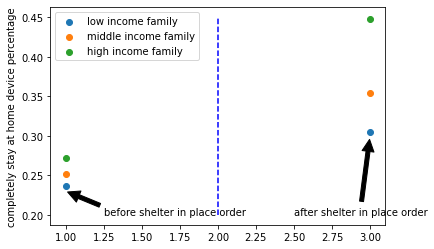

In [61]:
plt.scatter([1,3], [low_before, low_after],
            label = 'low income family')
plt.scatter([1,3], [middle_before, middle_after],
            label = 'middle income family')
plt.scatter([1,3], [high_before, high_after],
            label = 'high income family')
plt.legend()
plt.vlines(x=2, ymin=0.2, ymax=0.45, linestyles="dashed", colors='b')
plt.ylabel("completely stay at home device percentage")
plt.annotate('before shelter in place order', xy=(1, 0.23), xytext = (1.25, 0.20), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('after shelter in place order', xy=(3, 0.3), xytext = (2.5, 0.20), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

As we can see, the lower income families's stay at home percentages increases after shelter at home order is placed, but not as much as middle income family. Middle income family' stay at home behaviors didn't increase as much as high income family. \\
This makes some sense since the more money a family has the more easily they can afford to stay at home because they have money. Lower income family might still need to go out to work and everything

Now, since our handpicked values definition of low/ middle /high income might not be accurate, let's just use percentile wise definition. the lowest 25% income data in our data will be classified as low, and lowest 25% - 50% will be low middle, 50% - 75% will be middle, 75% - 100% will be high income. And let's see the diff in diff analysis in that setting. 

In [62]:
df_merged

,percent_completely_home_device_before,percent_completely_home_device_after_sip,Median Household Income
0,0.251283,0.289275,42412.0
1,0.196973,0.277490,40484.0
2,0.251292,0.337730,42879.0
3,0.254269,0.406879,66827.0
4,0.234935,0.299196,37392.0
...,...,...,...
2450,0.248405,0.307165,38912.0
2451,0.308820,0.380388,44116.0
2452,0.243436,0.313770,53253.0
2453,0.230928,0.340662,33160.0


In [63]:
df_merged = df_merged[['percent_completely_home_device_before', 'percent_completely_home_device_after_sip',\
                       'Median Household Income']]

In [64]:
df_merged

,percent_completely_home_device_before,percent_completely_home_device_after_sip,Median Household Income
0,0.251283,0.289275,42412.0
1,0.196973,0.277490,40484.0
2,0.251292,0.337730,42879.0
3,0.254269,0.406879,66827.0
4,0.234935,0.299196,37392.0
...,...,...,...
2450,0.248405,0.307165,38912.0
2451,0.308820,0.380388,44116.0
2452,0.243436,0.313770,53253.0
2453,0.230928,0.340662,33160.0


In [65]:
# using pandas cut function to cut dataframe in terms of median household income
# in 4 intervals, as we devised.
intervals = pd.cut(df_merged['Median Household Income'], 4)

In [66]:
# merge which interval row is in with dataframe
df_merged['income_interval'] = intervals

In [67]:
df_merged.head()

,percent_completely_home_device_before,percent_completely_home_device_after_sip,Median Household Income,income_interval
0,0.251283,0.289275,42412.0,"(25270.003, 54134.25]"
1,0.196973,0.277490,40484.0,"(25270.003, 54134.25]"
2,0.251292,0.337730,42879.0,"(25270.003, 54134.25]"
3,0.254269,0.406879,66827.0,"(54134.25, 82883.5]"
4,0.234935,0.299196,37392.0,"(25270.003, 54134.25]"


In [70]:
df_perc_stay_at_home_and_income_level = df_merged.groupby('income_interval').mean().reset_index()

In [71]:
df_perc_stay_at_home_and_income_level

,income_interval,percent_completely_home_device_before,percent_completely_home_device_after_sip,Median Household Income
0,"(25270.003, 54134.25]",0.244972,0.329537,44755.173213
1,"(54134.25, 82883.5]",0.258963,0.382257,63346.244275
2,"(82883.5, 111632.75]",0.270902,0.445643,92529.663366
3,"(111632.75, 140382.0]",0.279151,0.502732,122049.533333


In [73]:
df_perc_stay_at_home_and_income_level.iloc[0]['percent_completely_home_device_before']

0.2449719144099112

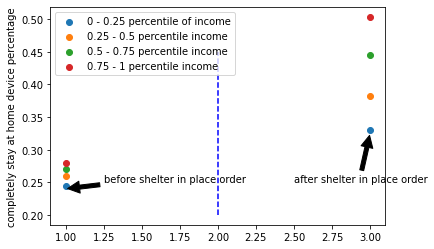

In [79]:
plt.scatter([1,3], [df_perc_stay_at_home_and_income_level.iloc[0]['percent_completely_home_device_before'],\
                    df_perc_stay_at_home_and_income_level.iloc[0]['percent_completely_home_device_after_sip']],
            label = '0 - 0.25 percentile of income')
plt.scatter([1,3], [df_perc_stay_at_home_and_income_level.iloc[1]['percent_completely_home_device_before'],\
                    df_perc_stay_at_home_and_income_level.iloc[1]['percent_completely_home_device_after_sip']],
            label = '0.25 - 0.5 percentile income')
plt.scatter([1,3], [df_perc_stay_at_home_and_income_level.iloc[2]['percent_completely_home_device_before'],\
                    df_perc_stay_at_home_and_income_level.iloc[2]['percent_completely_home_device_after_sip']],
            label = '0.5 - 0.75 percentile income')
plt.scatter([1,3], [df_perc_stay_at_home_and_income_level.iloc[3]['percent_completely_home_device_before'],\
                    df_perc_stay_at_home_and_income_level.iloc[3]['percent_completely_home_device_after_sip']],
            label = '0.75 - 1 percentile income')
plt.legend()
plt.vlines(x=2, ymin=0.2, ymax=0.45, linestyles="dashed", colors='b')
plt.ylabel("completely stay at home device percentage")
plt.annotate('before shelter in place order', xy=(1, 0.24), xytext = (1.25, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('after shelter in place order', xy=(3, 0.325), xytext = (2.5, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

As we can see, lowest 25% income family increases their behavior of stay at home after shelter in place, but not as much as lowest 25-50%, and not as much as top 50-25%, and top 25%. \\
**We can pretty much see a gradient - the more income a family has, the more drastic the positive change of stay at home behavior after shelter in place order is issued. This is pretty interesting**

Now let's do diff in diff analysis on variables other than median income

In [81]:
df_merged = pd.read_csv("merged_data.csv")

In [127]:
# the function of doing diff in diff analysis given a variable
def diff_in_diff_of_variable(variable):
  df = df_merged[['percent_completely_home_device_before', 'percent_completely_home_device_after_sip',\
                  variable]]
  intervals = pd.cut(df[variable], 4)
  df['interval'] = intervals
  result = df.groupby('interval').mean().reset_index()
  result['difference'] = result['percent_completely_home_device_after_sip'] -\
    result['percent_completely_home_device_before']
  # plot
  plt.scatter([1,3], [result.iloc[0]['percent_completely_home_device_before'],\
                      result.iloc[0]['percent_completely_home_device_after_sip']],
              label = f'0 - 0.25 percentile of {variable}')
  plt.scatter([1,3], [result.iloc[1]['percent_completely_home_device_before'],\
                      result.iloc[1]['percent_completely_home_device_after_sip']],
              label = f'0.25 - 0.5 percentile of {variable}')
  plt.scatter([1,3], [result.iloc[2]['percent_completely_home_device_before'],\
                      result.iloc[2]['percent_completely_home_device_after_sip']],
              label = f'0.5 - 0.75 percentile of {variable}')
  plt.scatter([1,3], [result.iloc[3]['percent_completely_home_device_before'],\
                      result.iloc[3]['percent_completely_home_device_after_sip']],
              label = f'0.75 - 1 percentile of {variable}')
  plt.legend()
  plt.vlines(x=2, ymin=0.2, ymax=0.45, linestyles="dashed", colors='b')
  plt.ylabel("completely stay at home device percentage")
  plt.annotate('before shelter in place order', xy=(1, 0.2))
  plt.annotate('after shelter in place order', xy=(2.2, 0.2))
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


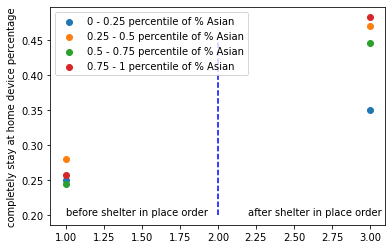

In [128]:
diff_in_diff_of_variable('% Asian')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


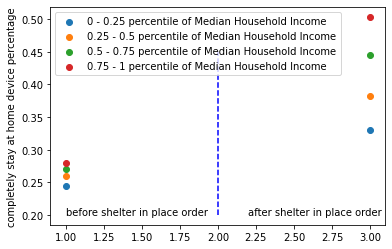

In [115]:
diff_in_diff_of_variable('Median Household Income')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


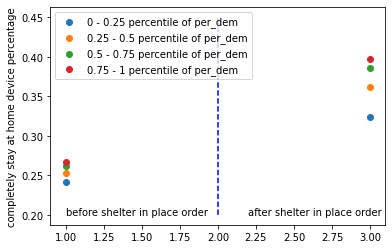

In [116]:
diff_in_diff_of_variable('per_dem')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


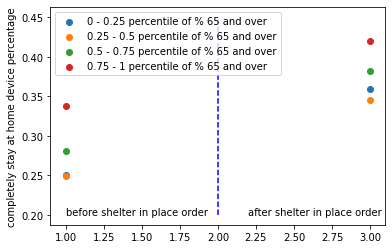

In [117]:
diff_in_diff_of_variable('% 65 and over')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


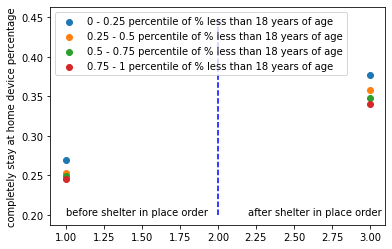

In [118]:
diff_in_diff_of_variable('% less than 18 years of age')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


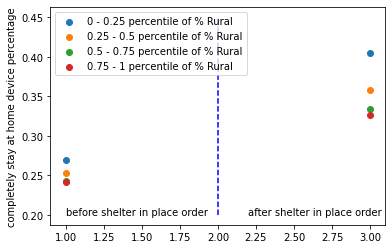

In [119]:
diff_in_diff_of_variable('% Rural')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


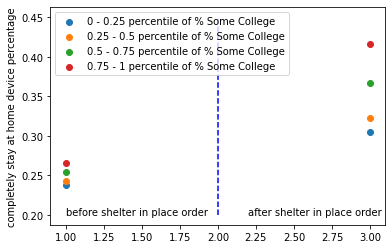

In [120]:
diff_in_diff_of_variable('% Some College')

From all the graphs we see that specifically change in **income level**, **% Some College** and **% Asian** influence change in % completely at home devices before/after shelter in place. other variables show some level of influnece but not a whole lot. \\